In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("data/Training.csv")
data.drop('fluid_overload.1', axis=1)
data.shape
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [4]:
x = data.drop('prognosis', axis=1).drop('Unnamed: 133', axis=1)
y = data['prognosis']
x.shape
y.shape



x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [5]:
def optimum(x_train, y_train, x_test, y_test): 
    
    train_errors = []
    test_errors = []
    depths = list(range(1,51))
    
    for depth in depths: 
        
        model = DecisionTreeClassifier(splitter='random', max_depth=depth)
        
        model.fit(x_train, y_train)
        
        learning_error = 1 - model.score(x_train, y_train) 
        train_errors.append(learning_error)
        
        testing_error = 1 - model.score(x_test, y_test)        
        test_errors.append(testing_error)
    
        best_depth = depths[np.argmin(test_errors)]
    
    return depths, best_depth, train_errors, test_errors

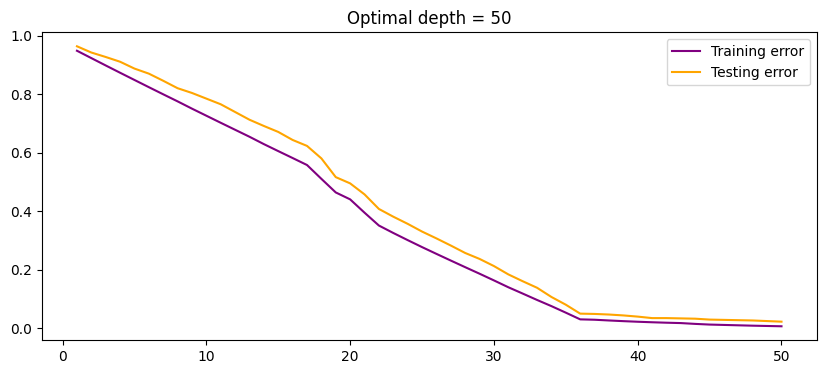

In [6]:
depths, best_depth, train_errors, test_errors = optimum(x_train, y_train, x_test, y_test)


fig = plt.figure(figsize=(10,4))
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depths, train_errors, c='purple', label='Training error')
plt.plot(depths, test_errors, c='orange', label='Testing error')
plt.legend()


plt.show()

In [7]:
model = DecisionTreeClassifier(splitter='random', max_depth=50, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42, splitter='random')

In [8]:
y_pred = model.predict(x_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9776422764227642


In [10]:
from joblib import dump

dump(model, 'models/model.joblib')

['models/model.joblib']

In [ ]:
#dump symptoms

with open('models/symptoms.joblib', 'wb') as f:
    symps = dump(list(x.columns), f)
len(x.columns)

132